# Total gamma ray absorption coefficient

# Introduction

The process of attenuation of a gamma-ray beam in a medium cannot be considered continuous as is the case for heavy charged particles. In the interaction of a photon with electrons of an atomic shell of a medium, the photon either loses all its energy by the photoelectric effect or by the creation of electron-positron pairs, or part of it by Compton (incoherent) scattering. The creation of electron-positron pairs can naturally also occur in the field of the nucleus. In coherent scattering, the photon does not deposit energy but changes direction. In incoherent scattering, it also changes direction besides the energy loss. For the experiment, the consequence of these interactions is the attenuation of the gamma-ray beam when passing through a layer of material of thickness $t$ according to the relation:
$$
N = N_0 e^{-\mu t},
$$
where $N_0$ is the number of gamma quanta incident on a layer of material of thickness $t$, $N$ is the number of photons with the original energy behind the layer of material, $\mu$ is the absorption coefficient or linear attenuation coefficient with the dimension $\mathrm{mm}^{-1}$.
Since the dependence of the attenuation of the gamma-ray beam on the thickness of the material has an exponential character, there is always a non-zero probability that a gamma quantum will pass through any thickness of any material without interaction.
Thus, for each given energy of incident photons, $E_\gamma$, the free path of individual photons can differ significantly from the mean free path $1/\mu(E_\gamma)$.

The interaction of electromagnetic radiation with matter is very well known. The individual cross-sections as a function of photon energy are, among other things, tabulated. The dependence of the absorption coefficient $\mu$ on the energy of incident photons $E_\gamma$ is shown for lead in the figure below (just run the python code). For specific experiments, it is often more practical to determine the attenuation of the beam experimentally (for a specific detector, geometry, ...) and possibly verify it using a computer simulation by the Monte Carlo method.
For the interaction of photons with material, the "nuclear photoelectric effect" (i.e., photo-nuclear reactions - e.g., $(\gamma, n)$) also has a non-zero effective cross-section. However, the effective cross-section of these reactions is negligible up to the initial photon energy on the order of ten MeV compared to the effective cross-sections of the above-mentioned interactions.

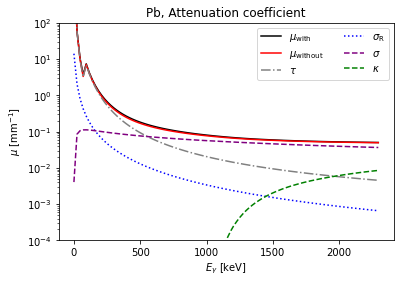

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the theory values, and multiply them by the density of the material.
# Convert units of E to keV and attenuation length to mm^-1.

# Read.
df = pd.read_csv('Pb_theory_all.txt', skiprows=3, sep='|', names=['E', 'sigma_R', 'sigma', 'tau', 'kappa_n', 'kappa_e', 'w', 'wo', ''])

# Parameter scaling by density and conversion to mm^-1
scale = 11.34 / 10

# Convert energy to keV
df['E']  *= 1000

# Calculate the total electron-positron pair production cross section.
df['kappa_tot'] = df['kappa_n'] + df['kappa_e']

# Plot the curves.
plt.plot(df['E'], df['w'] * scale, label=r'$\mu_\mathrm{with}$'   , color='black', linestyle='-')
plt.plot(df['E'], df['wo'] * scale, label=r'$\mu_\mathrm{without}$', color='red', linestyle='-')
plt.plot(df['E'], df['tau'] * scale, label=r'$\tau$', color='gray', linestyle='-.')
plt.plot(df['E'], df['sigma_R'] * scale, label=r'$\sigma_\mathrm{R}$', color='blue', linestyle=':')
plt.plot(df['E'], df['sigma'] * scale, label=r'$\sigma$', color='purple', linestyle='--')
plt.plot(df['E'], df['kappa_tot'] * scale, label=r'$\kappa$', color='green', linestyle='--')
plt.xlabel(r'$E_\gamma\ [\mathrm{keV}]$')
plt.ylabel(r'$\mu\ [\mathrm{mm}^{-1}]$')
plt.title(f'Pb, Attenuation coefficient')
plt.legend(ncol=2)
plt.yscale('log')
plt.ylim(1e-4, 1e2)
plt.show()

The figure above shows the dependence of the absorption coefficient $\mu$ on the photon energy $E_\gamma$ for lead. The graph distinguishes individual processes contributing to the attenuation of the photon beam in the measured energy range, specifically the photoelectric effect $\tau$, coherent or Rayleigh scattering $\sigma_\mathrm{R}$, Compton scattering $\sigma$, and electron-positron pair production $\kappa$. The total attenuation of the beam is then described by two curves - with coherent scattering included as an attenuating process $\mu_\mathrm{with}$ and without it, $\mu_\mathrm{without}$. The curves are an interpolation of values from https://www.nist.gov/pml/xcom-photon-cross-sections-database

# Experimental setup

As a source of photons, $^{226}\mathrm{Ra}$ emitter is used. The number of photons transmitted as a function of energy is measured using a semiconductor germanium detector connected to a computer with operating software. The slot in the stand between the emitter and the detector is used to insert layers of individual materials.



# Measurement

The measurement time for each material is typically set to 250 or 300 seconds. The measurement proceeds in the following steps:
- The $^{226}\mathrm{Ra}$ spectrum is measured without any shielding.
  - The resulting spectrum is used for the spectrometer calibration. Energies of the intense $^{226}\mathrm{Ra}$ lines are well known, and they are assigned to the corresponding peak locations in the spectrum.
- Twelve more measurements of the spectrum are performed:
  - For four different thicknesses of three different materials - Cd, Pb, Fe.
    - There are several plates of each material that can be gradually stacked in the slot between the radioactive source and the detector.
  - Thanks to this, we get the spectrum measurement for five different thicknesses of the shielding for each material, as the measurement without shielding (i.e. thickness of 0 mm) is also included, and it is common for all materials.
- In each spectrum, 15 peaks are identified and the number of events in each peak is determined.
  - The number of events in each peak is determined by the software used to control the spectrometer.
    - The number of events in each peak is corrected for the background.
  - The software also provides the energy of each peak.
  - The number of events in each peak decreases exponentially with the thickness of the shielding.
    - Recall the formula $N = N_0 e^{-\mu t}$.
    - Recall that the attenuation coefficient is a function of the energy of the photons: $\mu = \mu(E_\gamma)$.
      - The predefined 15 peaks correspond to 15 different photon energies. Thus, we can measure the attenuation coefficient for 15 different energies at the same time.
  - The 15 peaks are predefined based on their intensity. We would need longer that 300 s measurements to be able to use more peaks in the $^{226}\mathrm{Ra}$ spectrum.
- In each spectrum, there is also the omnipresent 1460 keV peak from the decay of $^{40}\mathrm{K}$.
  - $^{40}\mathrm{K}$ is a common source of background.
  - Being background, photons from $^{40}\mathrm{K}$ decays are coming to the detector from all directions. Therefore, the number of events in the 1460 keV peak is not affected by the thickness of the shielding.

$\color{red}{\textbf{Task:}}$ Read the measured data from the provided text files. Print the data corresponding to no shielding as a table. The data are summarized information about the 15 predefined peaks. For each peak, there is:
- the energy of the peak,
- the number of events in the peak.

In [3]:
# Insert your code here

import pandas as pd
import numpy as np

# Read in the data from the .dat file and store it in a pandas dataframe.
# The data is stored in format separated by blank spaces.
# Preprocess the file so that each row with less than 7 columns is filled with NaN values.
# For preprocessing, read the file line by line and split the line by the separator.
def read_data(file):
    with open(file, 'r') as f:
        lines = f.readlines()

    # Write the updated lines to a new file
    with open(file + '.2', 'w') as f:
        for line in lines:
            row = line.split()
            if len(row) < 7:
                row += ["NaN"] * (7 - len(row))
            f.write(','.join(row) + '\n')
    
    # Store the data in a pandas dataframe
    data = pd.read_csv(file + '.2', sep=',', header=None, skiprows=1)

    # Keep just the first 7 columns of the dataframe
    data = data.iloc[:, 0:7]

    # Rename the columns of the dataframe to the following:
    data.columns = ['PN', 'E', 'FWHM', 'N', 'B', 'Net C/S', '%Err']

    return data

    
# Read the data corresponding to no shielding.
data0 = read_data('P-IV_A4_001/0.dat')

# Print data0 to see whether the format is correct.
print(data0)

# Read in data from the following files in exactly the same way:
#              Cd_0214.dat  Cd_0428.dat  Fe_0500.dat  Fe_1578.dat  Pb_0530.dat  Pb_0762.dat  
# Cd_0106.dat  Cd_0322.dat  Fe_1092.dat  Fe_2074.dat  Pb_0650.dat  Pb_0872.dat  
# All dataframes are stored in a dictionary with the keys being Cd, Fe, Pb.
# The values are dictionaries: {thickness: dataframe, thickness: dataframe, ...}
# where thickness is the thickness of the shielding in 10e-5 m and dataframe is the dataframe.
# The thickness is the number in the file name before the .dat extension.

files = ['P-IV_A4_001/Cd_0106.dat', 'P-IV_A4_001/Cd_0214.dat', 'P-IV_A4_001/Cd_0322.dat', 'P-IV_A4_001/Cd_0428.dat', 'P-IV_A4_001/Fe_0500.dat', 'P-IV_A4_001/Fe_1092.dat', 'P-IV_A4_001/Fe_1578.dat', 'P-IV_A4_001/Fe_2074.dat', 'P-IV_A4_001/Pb_0530.dat', 'P-IV_A4_001/Pb_0650.dat', 'P-IV_A4_001/Pb_0762.dat', 'P-IV_A4_001/Pb_0872.dat']
data_dict = {}
for file in files:
    element = file.split('/')[-1].split('_')[0]
    thickness = int(file.split('_')[-1].split('.')[0]) / 100.
    data = read_data(file)
    if element not in data_dict:
        data_dict[element] = {0. : data0} # Store the data with no shielding to the first element of the list
    data_dict[element][thickness] = data


    PN        E  FWHM       N      B  Net C/S   %Err
0    1   242.02  1.57    2988  16678    9.960   9.34
1    2   295.26  1.64   18565  20953   61.883   2.02
2    3   351.94  1.65   54515  12973  181.717   0.61
3    4   511.02  3.21    6293  11418   20.977   4.40
4    5   609.31  1.86  101442   7575  338.140   0.37
5    6   768.38  2.01   10911   5558   36.370   1.91
6    7   934.07  2.31    6542   4935   21.807   2.87
7    8  1120.28  2.45   29676   3749   98.920   0.78
8    9  1238.09  2.72   11230   2805   37.433   1.54
9   10  1377.67  2.84    7093   2723   23.643   2.21
10  11  1460.91  2.23     550   1979    1.833  18.91
11  12  1509.27  2.82    3536   2562   11.787   3.85
12  13  1729.57  3.00    4405    971   14.683   2.32
13  14  1764.53  3.25   23754   1226   79.180   0.77
14  15  1847.39  3.43    3055    744   10.183   2.85
15  16  2204.09  3.92    6343    345   21.143   1.48


$\color{red}{\textbf{Task:}}$ Read the theoretic values of the attenuation coefficients of gamma rays in Fe, Cd, and Pb from text files that were provided by the online database https://www.nist.gov/pml/xcom-photon-cross-sections-database Note that the attenuation coefficients are given in $\mathrm{cm}^2/\mathrm{g}$. Multiply it by the density of the material to get the attenuation coefficient in $\mathrm{cm}^{-1}$. Convert units to $\mathrm{mm}^{-1}$. Plot the theoretical dependence of the attenuation coefficient on the energy of gamma rays for each material. The plot should contain two curves for each material - with coherent scattering included as an attenuating process and without it.

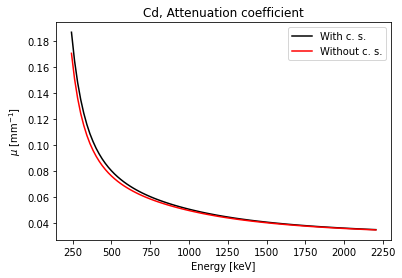

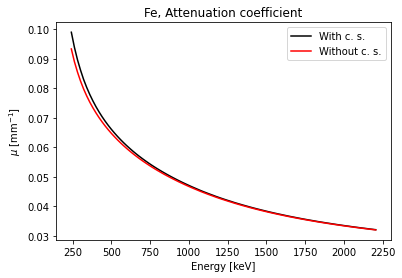

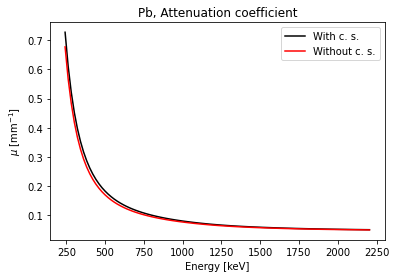

In [5]:
# Insert your code here

import pandas as pd
import matplotlib.pyplot as plt

def read_attenuation_length(file):
    return pd.read_csv(file, skiprows=3, sep='|', names=['E', 'w', 'wo', ''])

# Read in the data to the theory dictionary, and multiply by the density of the material.
# Convert units of E to keV and attenuation length to mm^-1.
density = {'Cd': 8.65, 'Fe': 7.86, 'Pb': 11.34}
theory = {}
for element in data_dict:
    df = read_attenuation_length(f'{element}_attenuation_length.txt')
    df['E']  *= 1000 # Convert to keV
    df['w']  *= density[element] / 10 # Scale by density and convert to mm^-1
    df['wo'] *= density[element] / 10 # Scale by density and convert to mm^-1
    theory[element] = df

# Plot the curves.
for element in theory:
    df = theory[element]
    plt.plot(df['E'], df['w'] , label='With c. s.'   , color='black')
    plt.plot(df['E'], df['wo'], label='Without c. s.', color='red')
    plt.xlabel('Energy [keV]')
    plt.ylabel(r'$\mu\ [\mathrm{mm}^{-1}]$')
    plt.title(f'{element}, Attenuation coefficient')
    plt.legend()
    plt.show()

For plotting data together with the fitted curve, the following python function can be handy:

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot(x, y, y_err, x_fit, y_fit, y_fit_lower, y_fit_upper, xlabel, ylabel, title = ''):

    # draw x, y with error bars
    plt.errorbar(x, y, y_err, fmt='o', label='Data', color='black')

    # draw the fit function and its uncertainty band
    plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color='red', alpha=0.3)

    # create a legend entry for the fit function and its uncertainty band
    line_with_band = mpl.lines.Line2D([], [], color='red', label='Fit', linestyle='-', linewidth=2)
    band = mpl.patches.Patch(color='red', alpha=0.3, label='Fit uncertainty')

    # get the current legend handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles=handles + [(line_with_band, band)], labels=labels + ['Fit'])

    # finally, plot
    plt.plot(x_fit, y_fit, 'r-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if title != '':
        plt.title(title)
    plt.show()

    return

$\color{red}{\textbf{Task:}}$ For each shielding material (Fe, Cd, Pb), and for each peak, determine the attenuation coefficient $\mu$:
- Fit the graph of the number of events in the peak, $N$, vs. the shielding thickness.
  - There are five points in the graph: no shielding and four different thicknesses of the shielding.
  - The fit function is $N = N_0 e^{-\mu t}$.
  - Plot the data and the fitted curve for two peaks of your choice for each material.
- Store the attenuation coefficient $\mu$, and the corresponding energy for each peak.
  - E.g. in a dictionary with the energy as the key and the attenuation coefficient as the value.

/tmp/ipykernel_40700/2906822845.py:18: RuntimeWarning: overflow encountered in exp
  return N0 * np.exp(-mu * x)


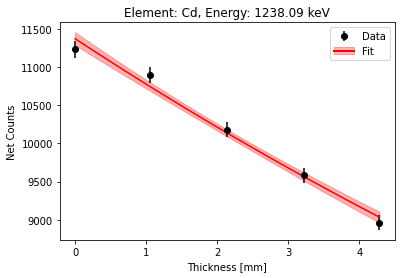

Element: Cd, Energy: 1238.09 keV, Mu: 0.0537+/-0.0029 mm^-1


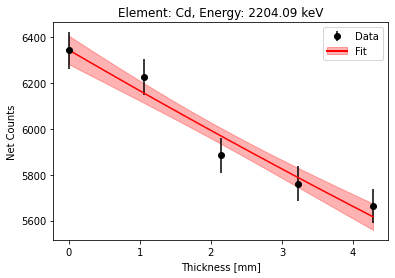

Element: Cd, Energy: 2204.09 keV, Mu: 0.029+/-0.004 mm^-1


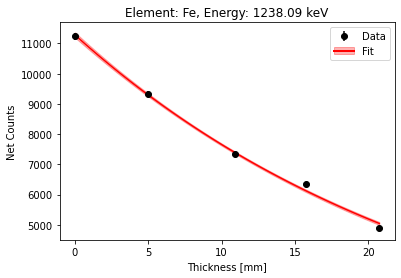

Element: Fe, Energy: 1238.09 keV, Mu: 0.0388+/-0.0007 mm^-1


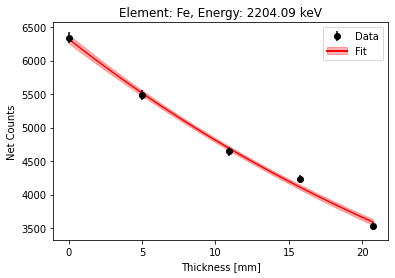

Element: Fe, Energy: 2204.09 keV, Mu: 0.0273+/-0.0009 mm^-1


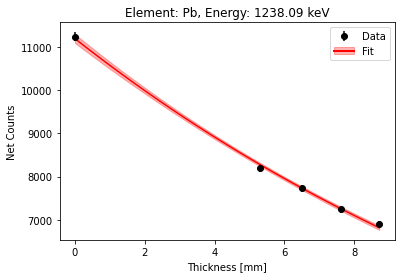

Element: Pb, Energy: 1238.09 keV, Mu: 0.0568+/-0.0015 mm^-1


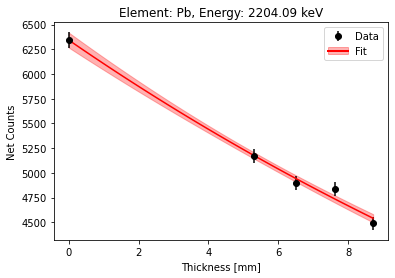

Element: Pb, Energy: 2204.09 keV, Mu: 0.0384+/-0.0019 mm^-1


In [7]:

# Do the following for each element in the dictionary:
# - Create a new dataframe with the following columns:
#   - PN
#   - E
#   - mu
#   - mu_unc
# mu is the linear attenuation coefficient in mm^-1 and mu_unc is the uncertainty on mu.
# mu is evaluated in a fit of the form N = N0 * exp(-mu * thickness)
# where N is the net counts in a peak, N0 is the net counts with no shielding, and thickness is the thickness of the shielding.
# The uncertainty in N, estimated as sqrt(N), is taken into account in the fit.
# The uncertainty in mu is calculated in the fitting algorithm.

import numpy as np
from scipy.optimize import curve_fit
import uncertainties

def fit_func(x, mu, N0):
    return N0 * np.exp(-mu * x)

# Store the fit results - the mu values and their uncertainties - in a dictionary together with the corresponding energies.
fit_results = {element : {} for element in data_dict}

for element in data_dict:
    for irow in range(16):
        if irow == 10: # Skip the row with the potassium 40 background peak
            continue
        thickness = np.array(sorted(data_dict[element].keys()))
        N         = np.array([data_dict[element][t].loc[irow, 'N'] for t in thickness])

        try:
            nom, cov = curve_fit(fit_func, thickness, N, sigma=np.sqrt(N), absolute_sigma=True)
            mu = nom[0]
            mu_unc = np.sqrt(cov[0, 0])
        except:
            mu = np.nan
            mu_unc = np.nan
    
        # Store the fit result
        energy = data_dict[element][0.].loc[irow, 'E']
        fit_results[element][energy] = uncertainties.ufloat(mu, mu_unc)

        # Prepare the fit result plotting
        x = np.linspace(thickness.min(), thickness.max(), 100)
        mu, N0 = uncertainties.correlated_values(nom, cov)
        wrapped_exp = uncertainties.wrap(fit_func)
        y_fit_list = [wrapped_exp(x, mu, N0) for x in x]
        y_fit      = np.array([y.nominal_value for y in y_fit_list])
        sigma_fit  = np.array([y.std_dev       for y in y_fit_list])

        # Plot the data and the fit function with its uncertainty band
        title = f'Element: {element}, Energy: {data_dict[element][0.].loc[irow, "E"]} keV'
        if irow in [8, 15]:
            plot(thickness, N, np.sqrt(N), x, y_fit, y_fit - sigma_fit, y_fit + sigma_fit, 'Thickness [mm]', 'Net Counts', title)
            print(f'{title}, Mu: {mu} mm^-1')




$\color{red}{\textbf{Task:}}$ Print a table with the attenuation coefficients for each energy and each material. Also include the half-value layer (HVL), $t_{1/2}$, for each energy and each material. The HVL is defined as the thickness of the material that reduces the intensity of the gamma-ray beam to half of its initial value. The HVL can be calculated as:
$$
t_{1/2} = \frac{\ln(2)}{\mu}.
$$

In [8]:
# Python DataFrame is suitable for presenting the results.

df = pd.DataFrame(fit_results)
df = df.rename_axis('Energy [keV]').reset_index()

for element in data_dict:
    df[f't_{element} [mm]'] = np.log(2) / df[element]

df = df.rename(columns={'Cd': 'mu_Cd [mm^-1]', 'Fe': 'mu_Fe [mm^-1]', 'Pb': 'mu_Pb [mm^-1]'})
print(df)


    Energy [keV]    mu_Cd [mm^-1]      mu_Fe [mm^-1]    mu_Pb [mm^-1]  \
0         242.02    0.135+/-0.007    0.0986+/-0.0019        nan+/-nan   
1         295.26  0.1205+/-0.0025    0.0797+/-0.0007  0.3615+/-0.0022   
2         351.94  0.0972+/-0.0014    0.0713+/-0.0004  0.2793+/-0.0010   
3         511.02    0.072+/-0.004    0.0456+/-0.0010  0.0783+/-0.0021   
4         609.31  0.0587+/-0.0010  0.05401+/-0.00025  0.1129+/-0.0005   
5         768.38  0.0558+/-0.0030    0.0475+/-0.0007  0.0833+/-0.0016   
6         934.07    0.061+/-0.004    0.0459+/-0.0010  0.0678+/-0.0020   
7        1120.28  0.0412+/-0.0018    0.0399+/-0.0004  0.0599+/-0.0009   
8        1238.09  0.0537+/-0.0029    0.0388+/-0.0007  0.0568+/-0.0015   
9        1377.67    0.031+/-0.004    0.0333+/-0.0009  0.0493+/-0.0019   
10       1509.27    0.020+/-0.005    0.0306+/-0.0012  0.0450+/-0.0026   
11       1729.57    0.029+/-0.005    0.0293+/-0.0011  0.0425+/-0.0024   
12       1764.53  0.0308+/-0.0020    0.0311+/-0.000

$\color{red}{\textbf{Task:}}$ For each material, plot the attenuation coefficient as a function of the energy of gamma rays.
- Plot the theoretical values of the attenuation coefficients on the same graph.
  - Two curves: with coherent scattering included as an attenuating process and without it.
- Display the measured values as points, and their uncertainties as vertical error bars.

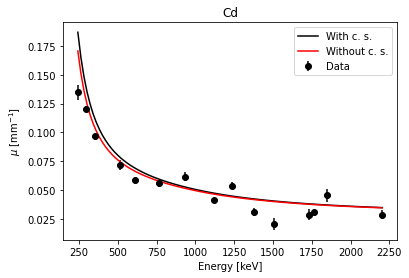

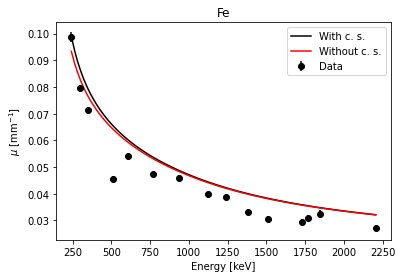

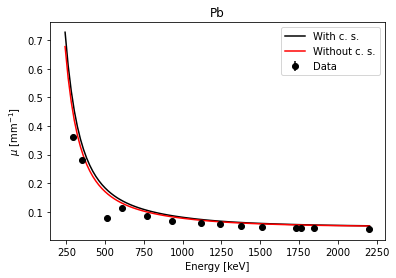

In [9]:
# Insert your code here

for element in fit_results:

    energies = np.array(sorted(fit_results[element].keys()))
    # Remove elements around 1460 from energies (the potassium 40 peak)
    energies = np.delete(energies, np.where((energies > 1450) & (energies < 1470)))

    # Plot the data.
    mus = np.array([fit_results[element][e].nominal_value for e in energies])
    mus_unc = np.array([fit_results[element][e].std_dev for e in energies])
    plt.errorbar(energies, mus, mus_unc, fmt='o', label='Data', color='black')

    # Plot the theory curves.
    df = theory[element]
    plt.plot(df['E'], df['w'] , label='With c. s.'   , color='black')
    plt.plot(df['E'], df['wo'], label='Without c. s.', color='red')

    # Labels etc.
    plt.xlabel('Energy [keV]')
    plt.ylabel(r'$\mu\ [\mathrm{mm}^{-1}]$')
    plt.title(f'{element}')
    plt.legend()
    x = np.linspace(energies.min(), energies.max(), 100)
    plt.show()


$\color{red}{\textbf{Task:}}$ Discuss the results:
- Compare the measured and theoretical values of the attenuation coefficients.
- Discuss the uncertainty determination of the measured values.
  - Are some effects neglected in the uncertainty determination?
    - Discuss the influence of the apparatus geometry on the measurement results (in relation to any possible systematic trends in the measured values).

$\color{red}{\textbf{Solution}}$ 

$\color{red}{\textbf{Task:}}$ For the $^{40}\mathrm{K}$ background peak (1460 keV):
- Make a graph of the number of events in the peak as a function of the thickness of the shielding.
  - Show the data from all measurements (Fe, Cd, Pb) in the same graph.
- Fit the graph with a constant function.

Found peak at energy 1460.91 keV


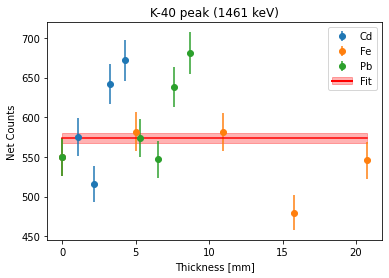

K-40 peak (1461 keV) fit result: c = 574+/-6


In [10]:
# Insert your code here

# Check the index of the row with the potassium 40 peak, based on the energy.
idx = data_dict['Cd'][0.][data_dict['Cd'][0.]['E'].between(1450, 1470)].index[0]

# Check if we found the correct peak by printing its energy
print(f"Found peak at energy {data_dict['Cd'][0.].loc[idx, 'E']} keV")

# Plot N vs thickness for the potassium 40 peak for each material
for element in data_dict:
    thickness = np.array(sorted(data_dict[element].keys()))
    N = np.array([data_dict[element][t].loc[idx, 'N'] for t in thickness])
    plt.errorbar(thickness, N, yerr=np.sqrt(N), fmt='o', label=element)

# Fit with a constant function
def fit_func(x, c):
    return c * np.ones_like(x)

# Combine all data points for the fit
all_N = []
all_thickness = []
all_N_err = []
for element in data_dict:
    thickness = np.array(sorted(data_dict[element].keys()))
    N = np.array([data_dict[element][t].loc[idx, 'N'] for t in thickness])
    all_N.extend(N)
    all_thickness.extend(thickness)
    all_N_err.extend(np.sqrt(N))

all_N = np.array(all_N)
all_thickness = np.array(all_thickness)
all_N_err = np.array(all_N_err)

# Do the fit
nom, cov = curve_fit(fit_func, all_thickness, all_N, sigma=all_N_err, absolute_sigma=True)
c = uncertainties.ufloat(nom[0], np.sqrt(cov[0, 0]))

# Plot the fit result
x = np.linspace(0, max(all_thickness), 100)
plt.plot(x, fit_func(x, c.nominal_value), 'r-')

# draw the fit function uncertainty band
plt.fill_between(x, fit_func(x, c.nominal_value - c.std_dev), fit_func(x, c.nominal_value + c.std_dev), color='red', alpha=0.3)

plt.xlabel('Thickness [mm]')
plt.ylabel('Net Counts')
plt.title('K-40 peak (1461 keV)')


# create a legend entry for the fit function and its uncertainty band
line_with_band = mpl.lines.Line2D([], [], color='red', label='Fit', linestyle='-', linewidth=2)
band = mpl.patches.Patch(color='red', alpha=0.3, label='Fit uncertainty')

# get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles + [(line_with_band, band)], labels=labels + ['Fit'])

plt.show()

# Print the fit result
print(f'K-40 peak (1461 keV) fit result: c = {c}')


$\color{red}{\textbf{Task:}}$ Discuss the results obtained for the $^{40}\mathrm{K}$ background peak (1461 keV).

$\color{red}{\textbf{Solution:}}$